## 1-  Importing numpy , pandas , Matplotlib , Seaborn , warnings

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## 2- Import and load data

In [6]:
df = pd.read_csv("data/stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3- Data checks to preform : 

* check missing values
* check duplicates 
* check data type 
* check number of unique values
* check statistics of dataset
* Data exploring  

### 3.1 Check missing values

In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### No missing values

### 3.2 check duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### No duplicates found


### 3.3 check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking unique values

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 statistics of dataset

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.6 Data exploring

In [13]:
print("Categories in : ",end="")
print(df['gender'].value_counts())

print("Categories in :  ",end = "")
print(df['race_ethnicity'].value_counts())

print("Categories in  : ",end="")
print(df['parental_level_of_education'].value_counts())

print("Categories in :",end="")
print(df['lunch'].value_counts())

print("caregories in : ",end="")
print(df['test_preparation_course'].value_counts())

Categories in : gender
female    518
male      482
Name: count, dtype: int64
Categories in :  race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Categories in  : parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Categories in :lunch
standard        645
free/reduced    355
Name: count, dtype: int64
caregories in : test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [14]:
## Defining numerical , categorical features 
num_features = df.select_dtypes(include=["int64","float64","int32","float32"]).columns.to_list()
cat_features = df.select_dtypes(include=["object","category"]).columns.to_list()

print(f"numerical features are {num_features}")
print(f"categorical features are {cat_features}")

numerical features are ['math_score', 'reading_score', 'writing_score']
categorical features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
# Add columns for total score , average score :
df['total_score'] = df['math_score']+df['writing_score'] +df['reading_score']
df['average_score'] = df['total_score'] / 3

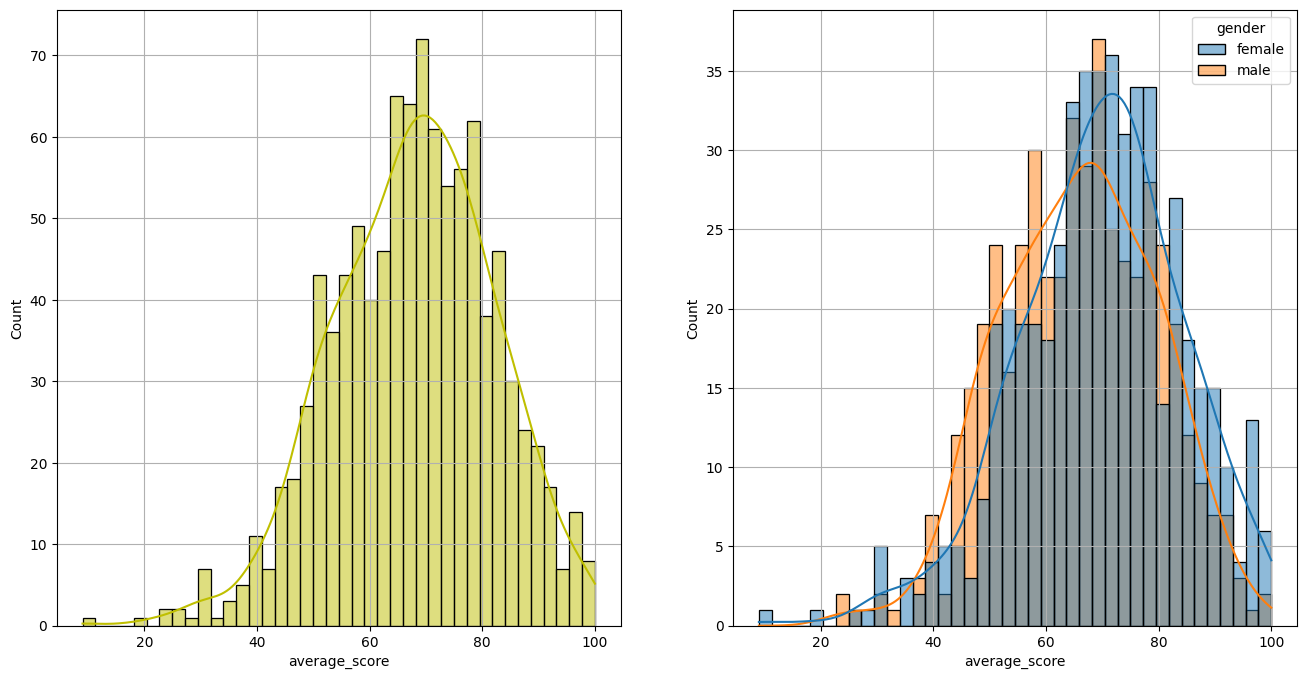

In [17]:
fig , axs = plt.subplots(1,2,figsize=(16,8))
sns.histplot(data = df , x='average_score' , bins = 40 , kde=True , color = 'y',ax=axs[0])
sns.histplot(data = df , x='average_score' , bins = 40 , kde=True , hue='gender',ax=axs[1])
axs[0].grid(True)
axs[1].grid(True)
plt.show()